In [95]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [96]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [97]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

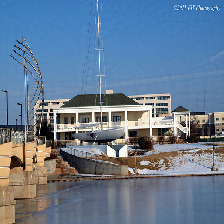

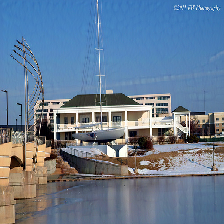

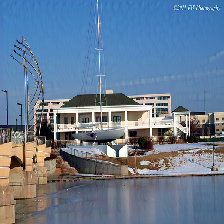

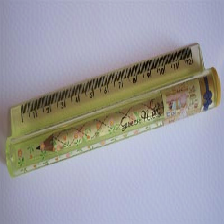

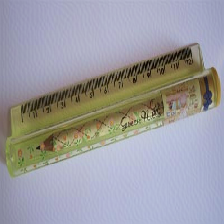

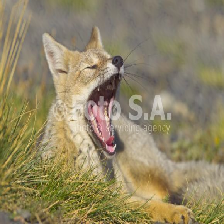

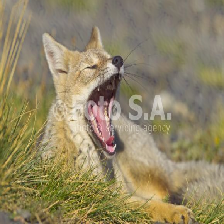

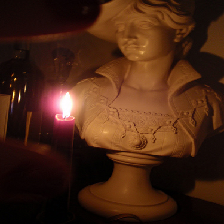

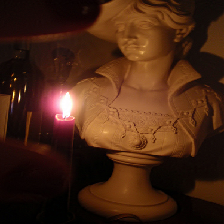

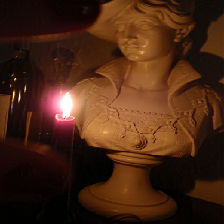

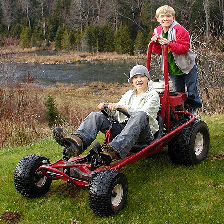

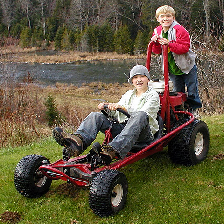

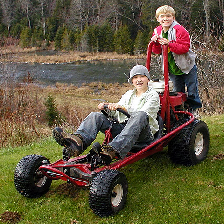

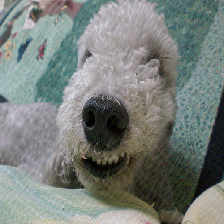

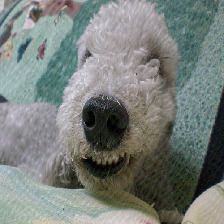

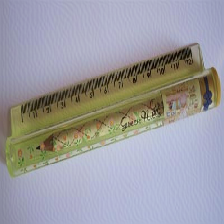

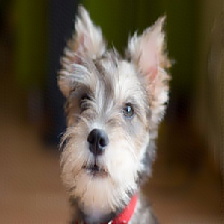

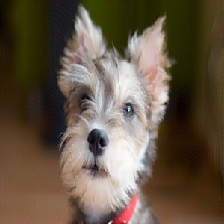

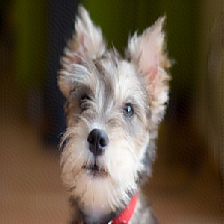

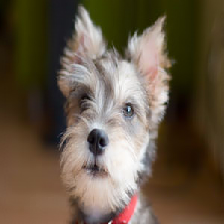

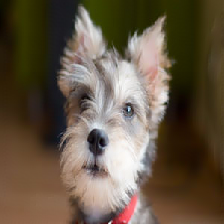

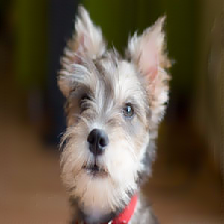

In [98]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

# The local path to our target image
from os import walk

path = "ImageNet/generated_inputs/0602/"
filenames = next(walk(path), (None, None, []))[2]  # [] if no file
for file in filenames: 
    display(Image(path + file))

1/1 [==============================] - 1s 523ms/step
Predicted: [('n03216828', 'dock', 8.11005)]


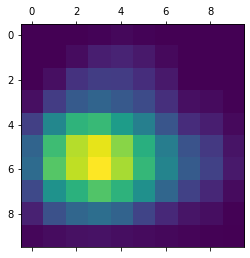

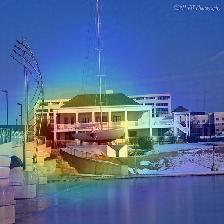

1/1 [==============================] - 0s 493ms/step
Predicted: [('n03216828', 'dock', 8.373511)]


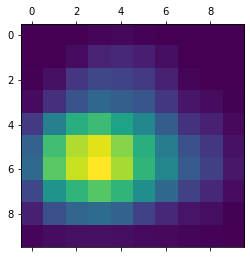

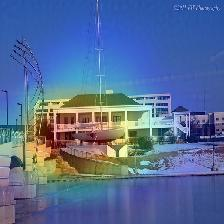

1/1 [==============================] - 0s 494ms/step
Predicted: [('n03216828', 'dock', 8.524163)]


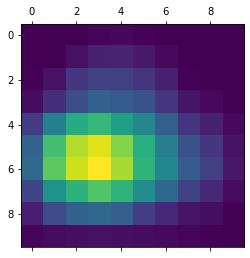

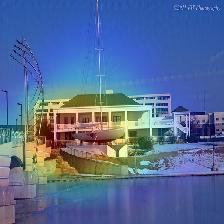

1/1 [==============================] - 0s 442ms/step
Predicted: [('n04118776', 'rule', 6.9810066)]


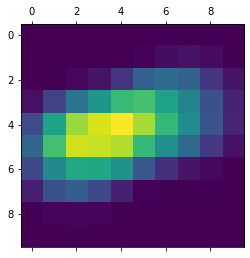

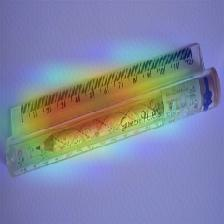

1/1 [==============================] - 0s 441ms/step
Predicted: [('n04118776', 'rule', 7.049509)]


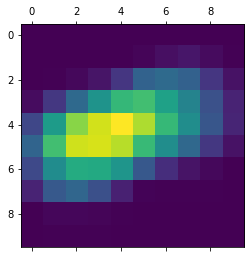

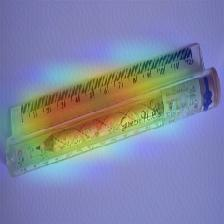

1/1 [==============================] - 0s 499ms/step
Predicted: [('n02119789', 'kit_fox', 8.598495)]


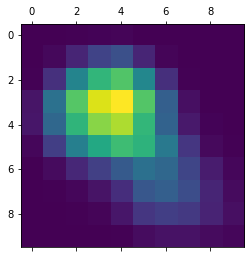

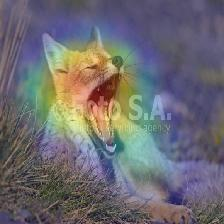

1/1 [==============================] - 0s 454ms/step
Predicted: [('n02119789', 'kit_fox', 8.641064)]


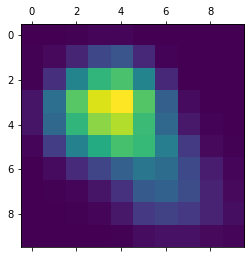

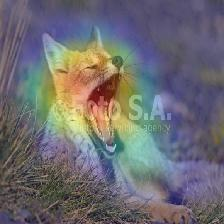

1/1 [==============================] - 1s 502ms/step
Predicted: [('n03637318', 'lampshade', 5.933154)]


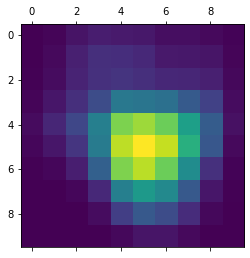

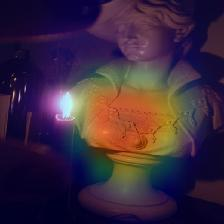

1/1 [==============================] - 0s 463ms/step
Predicted: [('n03637318', 'lampshade', 5.6060214)]


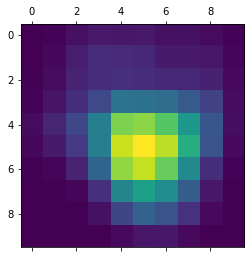

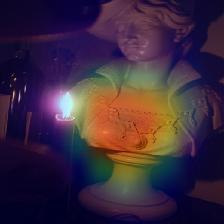

1/1 [==============================] - 0s 450ms/step
Predicted: [('n03637318', 'lampshade', 5.214202)]


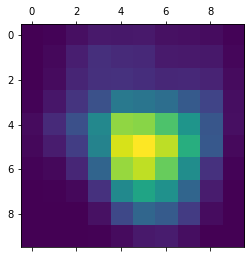

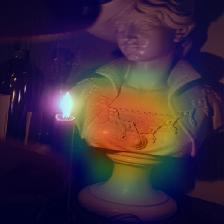

1/1 [==============================] - 1s 710ms/step
Predicted: [('n03444034', 'go-kart', 11.07526)]


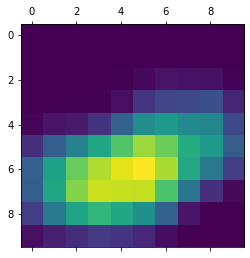

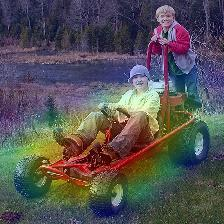

1/1 [==============================] - 0s 484ms/step
Predicted: [('n03444034', 'go-kart', 10.853336)]


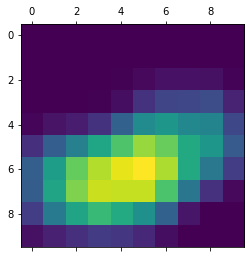

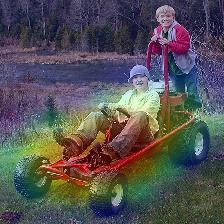

1/1 [==============================] - 1s 522ms/step
Predicted: [('n03444034', 'go-kart', 10.664071)]


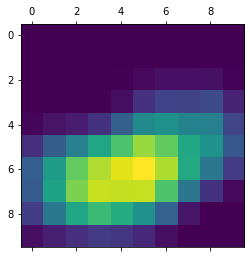

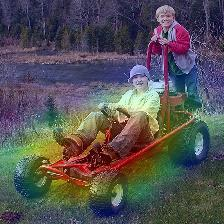

1/1 [==============================] - 0s 466ms/step
Predicted: [('n02093647', 'Bedlington_terrier', 10.990776)]


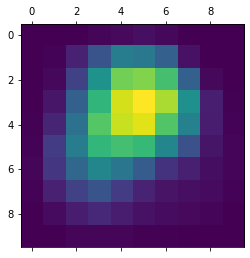

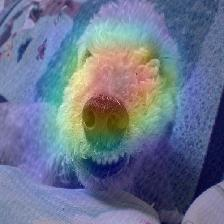

1/1 [==============================] - 0s 477ms/step
Predicted: [('n02093647', 'Bedlington_terrier', 11.079522)]


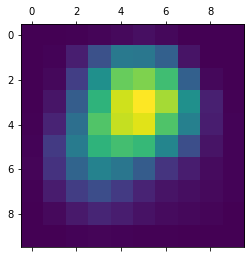

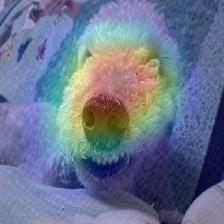

1/1 [==============================] - 0s 488ms/step
Predicted: [('n04118776', 'rule', 7.0582657)]


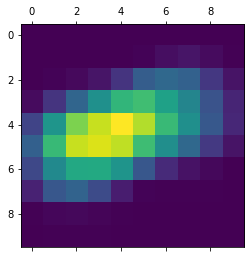

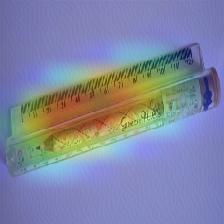

1/1 [==============================] - 0s 463ms/step
Predicted: [('n02097047', 'miniature_schnauzer', 8.335405)]


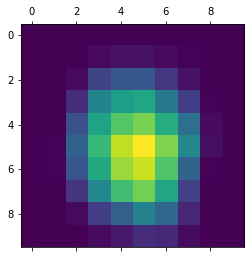

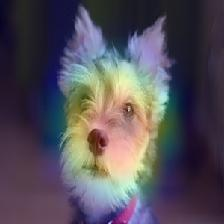

1/1 [==============================] - 1s 550ms/step
Predicted: [('n02097047', 'miniature_schnauzer', 8.618263)]


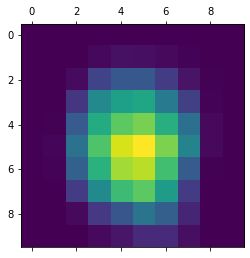

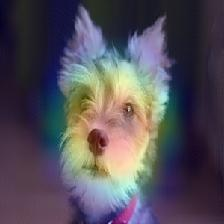

1/1 [==============================] - 0s 485ms/step
Predicted: [('n02097047', 'miniature_schnauzer', 8.923609)]


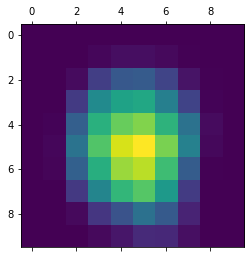

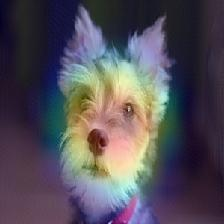

1/1 [==============================] - 0s 469ms/step
Predicted: [('n02097047', 'miniature_schnauzer', 7.2351437)]


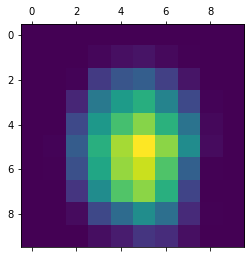

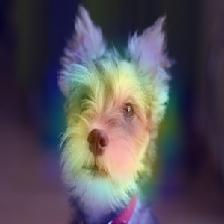

1/1 [==============================] - 0s 479ms/step
Predicted: [('n02097047', 'miniature_schnauzer', 7.812477)]


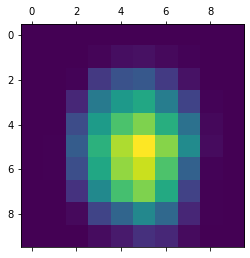

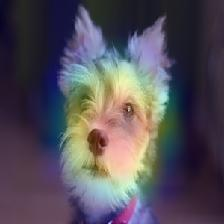

1/1 [==============================] - 0s 480ms/step
Predicted: [('n02097047', 'miniature_schnauzer', 8.038167)]


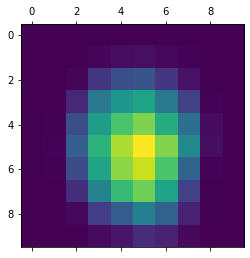

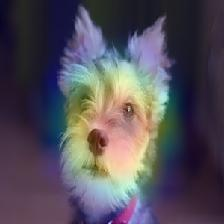

In [99]:
for file in filenames:
    # Prepare image
    img_array = preprocess_input(get_img_array(path + file, size=img_size))

    # Make model
    model = model_builder(weights="imagenet")

    # Remove last layer's softmax
    model.layers[-1].activation = None

    # Print what the top predicted class is
    preds = model.predict(img_array)
    print("Predicted:", decode_predictions(preds, top=1)[0])

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Display heatmap
    plt.matshow(heatmap)
    plt.show()
    save_and_display_gradcam(path + file, heatmap)